# Problématique

<h3> Prédire le mot dans l'image </h3>

- Sample de 1000 observations (1000 mots) : charger (function preprocess (utiliser en sortie un .numpy() pour avoir des arrays), container toutes observations pour faire une matrice de taille (nb_observation, nb_features).
- Modèle Deep learning : RNN
- Évaluation du modèle : ?


# Import

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import re
from os.path import exists
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import string


import letter_detection_utils as ld_util
import preprocessing as pp
import ressources as rss
import modele as mdl



In [6]:
# Pour recharger les libs pendant les devs
from importlib import reload 
reload(ld_util)
reload(pp)
reload(rss)
reload(mdl)


<module 'modele' from 'd:\\GitHub\\OCRpyMAN\\notebooks\\modele.py'>

In [38]:
# BIDOUILLE SALE!! pour importer des fichiers qui ne sont pas dans le meme repertoire. les fichiers devront être mieux rangés par la suite
# import sys
# sys.path.insert(1, '../')

# import preprocessing as pp
# import ressources as rss

# Chargement du dataframe

In [2]:
# initialisation des variables globales
rss.init()

plouf:  False
path : ../data/canny/g06-011c-05-02.png


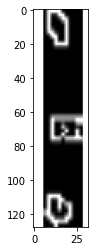

In [79]:
def process_1_img_canny(x, y):
    
    path_tmp = ''
    path= ''
    try:
        path = x.numpy().decode('utf-8')
        file_name = path.split('/')[-1]
        path_tmp = '../data/canny/' + file_name  # toutes les images au format canny seront stockées dans ce dossier

        if not os.path.exists(path_tmp):
            image = cv2.imread(path) 
            edged = cv2.Canny(image, 30, 200)
            cv2.imwrite(path_tmp, edged)
        path = path_tmp
                
        
    except :
        print("Unexpected error:", sys.exc_info()[0])
    
    img = ld_util.preprocess(path, img_size=rss.img_size,  data_augmentation=True, is_threshold=True)  
    print('plouf: ', not os.path.exists(path_tmp))
    print('path :', path_tmp)
    return img, y


x,y = tf.py_function(process_1_img_canny, ['../data/words/g06/g06-011c/g06-011c-05-02.png', 'plouf'], [tf.float32, tf.string])

plt.imshow(x, cmap='gray')


In [70]:
#####TESTSSSS
df = pd.read_pickle('../pickle/df.pickle')

    # on filtre les chaines vides

df['clean_trans'] = df.transcription.apply(lambda x: ld_util.extract_allowed_chars_from_string(rss.charList, x))
df = df[(df['clean_trans'] != "") & (df['clean_trans'] == df['transcription'])]

#fix temporaire, à finaliser avec l'archi du projet
# df['word_img_path'] = df['word_img_path'].apply(lambda x: x[3:])

X_train, X_test, y_train, y_test = train_test_split(df['word_img_path'], df['transcription'].values, test_size=0.1, random_state=123)
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# dataset = tf.data.Dataset.from_tensor_slices((df['word_img_path'].values, df['transcription'].values))
# dataset_train = dataset_train.map(ld_util.process_1_img_canny)
dataset_train = dataset_train.map(lambda x,y: tf.py_function(ld_util.process_1_img_canny, [x, y], [tf.float32, tf.string]))
dataset_train = dataset_train.batch(64)


In [3]:
data_iter = iter(dataset_train)


NameError: name 'dataset_train' is not defined

In [72]:
#####TESTSSSS
x, y = next(data_iter)
# xx, yy = next(iter(dataset_test))


tmp = x[0]
# tmpp = xx[0]
# print(tmpp)
plt.imshow(tmp , cmap='gray')
# plt.ylim([0, 128])
# plt.xlim([0, 32])
# print(xx.shape)

Unexpected error: <class 'AttributeError'>
plouf:  True
path : 


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 113: invalid start byte
Traceback (most recent call last):

  File "C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    return func(device, token, args)

  File "C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 147, in __call__
    outputs = self._call(device, args)

  File "C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 154, in _call
    ret = self._func(*args)

  File "C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\eager\execute.py", line 54, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 113: invalid start byte


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext]

In [15]:
# Chargement avec tensorflow et dataset par batch
from importlib import reload 
reload(ld_util)
reload(pp)
reload(rss)
reload(mdl)

dataset_train, dataset_test, y_test = ld_util.get_dataset()
dataset_train_canny, dataset_test_canny, y_test_canny = ld_util.get_dataset(canny=True)

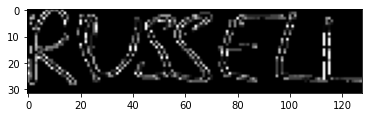

In [16]:
x, y = next(iter(dataset_train_canny))
x[0].shape

tmp = x[0]
# tmp = tf.squeeze(tmp, axis=2)
# tmp = np.swapaxes(tmp, 0, 1)
# tmp = tmp.reshape(128,32)
plt.imshow(tmp , cmap='gray');  # .reshape(rss.img_size)



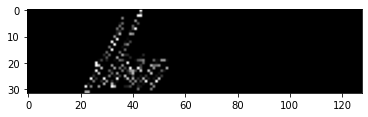

In [14]:
tmp = x[20]

plt.imshow(tmp , cmap='gray');  # .reshape(rss.img_size)

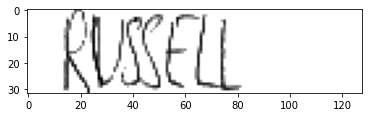

In [9]:
xx, yy = next(iter(dataset_train))
xx[0].shape

tmpp = xx[0]
plt.imshow(tmpp , cmap='gray');  # .reshape(rss.img_size)

# Model RNN

### Création Modèle

In [6]:
model = mdl.create_modele()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 128, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 32, 128, 32)      128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 64, 64)       2

In [7]:
class CTCLoss(tf.keras.losses.Loss):
    def __init__(self, logits_time_major=False, reduction=tf.keras.losses.Reduction.SUM, name='ctc'):
        super().__init__(reduction=reduction, name=name)
        self.logits_time_major = logits_time_major

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        logit_length = tf.fill([tf.shape(y_pred)[0]], tf.shape(y_pred)[1])
        label_length = tf.fill([tf.shape(y_true)[0]], tf.shape(y_true)[1])
        loss = tf.nn.ctc_loss(
            labels=y_true,
            logits=y_pred,
            label_length=label_length,
            logit_length=logit_length,
            logits_time_major=self.logits_time_major,
            blank_index=-1)
        return tf.reduce_mean(loss)


early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='tmp_model', 
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch'
)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=CTCLoss(), optimizer=optimizer)
history = model.fit(
    dataset_train,
    validation_data=dataset_test,
    callbacks=[
        early_stop_callback,
        checkpoint_callback
    ],
    epochs=10
)

Epoch 1/10
1335/1335 [==============================] - ETA: 0s - loss: 10.6076

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


1335/1335 [==============================] - 1882s 1s/step - loss: 10.6076 - val_loss: 7.1931
Epoch 2/10
1335/1335 [==============================] - ETA: 0s - loss: 5.3480

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


1335/1335 [==============================] - 1768s 1s/step - loss: 5.3480 - val_loss: 5.0016
Epoch 3/10
1335/1335 [==============================] - ETA: 0s - loss: 3.9706

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


1335/1335 [==============================] - 1779s 1s/step - loss: 3.9706 - val_loss: 4.3361
Epoch 4/10
1335/1335 [==============================] - ETA: 0s - loss: 3.2490

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


1335/1335 [==============================] - 1792s 1s/step - loss: 3.2490 - val_loss: 3.4291
Epoch 5/10
1335/1335 [==============================] - ETA: 0s - loss: 2.7965

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


1335/1335 [==============================] - 1770s 1s/step - loss: 2.7965 - val_loss: 2.9303
Epoch 6/10
1335/1335 [==============================] - ETA: 0s - loss: 2.4935

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


1335/1335 [==============================] - 1764s 1s/step - loss: 2.4935 - val_loss: 2.6144
Epoch 7/10
1335/1335 [==============================] - 1859s 1s/step - loss: 2.2664 - val_loss: 3.4397
Epoch 8/10
1335/1335 [==============================] - 1903s 1s/step - loss: 2.0901 - val_loss: 5.9838


In [13]:
# with open('../pickle/history_propershape3_canny.pickle', 'wb') as file_pi:
#      pickle.dump(history.history, file_pi)

# with open('../pickle/history_propershape3_canny.pickle', "rb") as file_pi:
#     history = pickle.load(file_pi)
    
model.save('ctc_model_fit_10')
model = tf.keras.models.load_model("ctc_model_fit_10", custom_objects={"CTCLoss": CTCLoss})



INFO:tensorflow:Assets written to: ram://22cea062-243d-4f1e-a21b-11b49ebda929/assets


INFO:tensorflow:Assets written to: ram://22cea062-243d-4f1e-a21b-11b49ebda929/assets


In [43]:
x, y = next(iter(dataset_train))
x.shape


TensorShape([64, 128, 32, 1])

In [11]:
y_pred = model.predict(dataset_test)


149/149 [==============================] - 98s 618ms/step


In [12]:
predicted_transcriptions = ld_util.greedy_decoder(y_pred, rss.charList)
list(zip(predicted_transcriptions, y_test[:10]))

[(',', "'"),
 ('th', 'the'),
 ('a', '#'),
 ('befcre', 'before'),
 ('ld', 'and'),
 ('.', '.'),
 ('grecatly', 'greatly'),
 ('abunt', 'about'),
 ('this', 'this'),
 ('lingfteinin', 'confidence')]

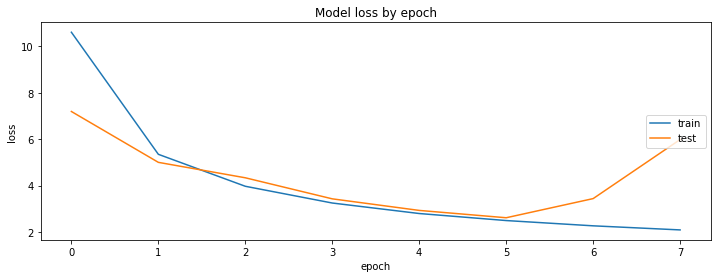

In [15]:
mdl.show_loss(history)